# DESAFIO - Aula_18 - Cross-validation

Base de Dados <br>
Fonte da dados: kaglgle <br>
Link: https://www.kaggle.com/mashimo/features-selection-for-multiple-linear-regression/data <br>
- Objetivo: prever o Rating do cliente usando: Renda(Income), Limite(Limit), Número de cartões(Card), Idade(Age), Educação(Education), Sexo(Gender), se o cliente é estudante (Student), se o cliente é casado (Married) e o saldo em cc(Balance)

Ajustar um modelos de regresão linear multipla
Usar um método de validação cruzada para validar o modelo


In [1]:
# carregando as librarys e sub-librarys
import pandas as pd #to load the data file as a Pandas data frame and analyze the data.
import numpy as np
from sklearn import datasets, linear_model #datasets-load a sample dataset linear_model-run a linear regression
from sklearn.model_selection import train_test_split #split to training and test sets
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import matplotlib
import statsmodels.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

/home/rodrigo/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Carrega base de dados Rating

In [3]:
credit = pd.read_csv("../data/Credit_1.csv")
credit.columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [4]:
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Parte_1: Dividindo a Base em treinamento e teste

Podemos usar a função train_test_split para fazer a divisão. <br>
O test_size = 0.2 dentro da função indica a porcentagem dos dados que devem ser mantidos para testes. <br>
Geralmente é cerca de 80/20 ou 70/30.

In [7]:
# dropando algumas variáveis
y = credit['Rating']
df = credit.drop('Rating', axis='columns')
df = df.drop('Ethnicity', axis='columns')
df = df.drop('Unnamed: 0', axis='columns')

In [8]:
# mudando o conteudo das variáveis binárias para 0 e 1
def native(Student):
    if Student in ["Yes"]:
        return 0
    else: 
        return 1 
#
def native1(Gender):
    if Gender in ["Male"]:
        return 0
    else: 
        return 1 
#
def native2(Married):
    if Married in ["Yes"]:
        return 0
    else: 
        return 1 

In [9]:
df['Student'] = df['Student'].apply(native)
df['Gender'] = df['Gender'].apply(native1)
df['Married'] = df['Married'].apply(native2)

In [10]:
df.head()

,Income,Limit,Cards,Age,Education,Gender,Student,Married,Balance
0,14.891,3606,2,34,11,1,1,0,333
1,106.025,6645,3,82,15,1,0,0,903
2,104.593,7075,4,71,11,1,1,1,580
3,148.924,9504,3,36,11,1,1,1,964
4,55.882,4897,2,68,16,1,1,0,331


In [11]:
# criando as bases de treinamento e teste
# fixando a semente para não alterar a amostra a cad vez que for rodar o programa
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.8, random_state=101)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(80, 9) (80,)
(320, 9) (320,)


## Parte_2: Ajustando um modelo linear na base de treinamento

In [12]:
X_train.head()

,Income,Limit,Cards,Age,Education,Gender,Student,Married,Balance
250,10.363,2430,2,47,18,1,1,0,0
14,19.144,3291,2,75,13,1,1,1,148
303,44.061,4970,1,79,11,1,1,0,414
3,148.924,9504,3,36,11,1,1,1,964
28,186.634,13414,2,41,14,1,1,0,1809


In [15]:
# Ajustando o modelo
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

# Obtendo as predições do modelo ajustado
p_train = lm.predict(X_train)
p_test = lm.predict(X_test)

print('Coef: ',model.coef_)
print('Intercepto: ', model.intercept_)

Coef:  [ 2.46786728e-01  5.84963818e-02  1.95483748e+00  4.65769687e-02
  1.50073126e-01 -2.22044605e-15  8.56660516e+00  7.98681364e-01
  3.07042566e-02]
Intercepto:  33.326605630708116


In [16]:
score_train = lm.score(X_train,y_train)
score_test = lm.score(X_test,y_test)
print("Train score: ", score_train)
print("Test score: ", score_test)

Train score:  0.9966023732608412
Test score:  0.9944724720400493




 ---Base de Train---


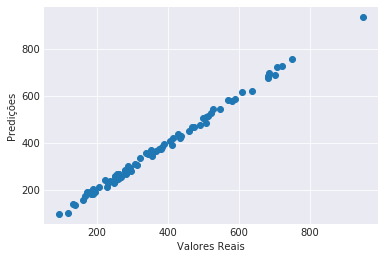



 ---Base de Test---


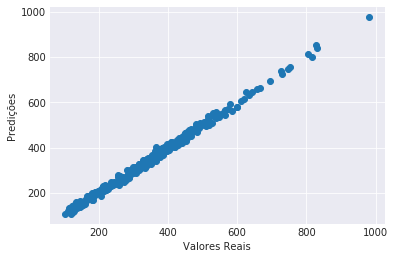

In [18]:
## Plotando o modelo ajustado
print ("\n\n ---Base de Train---")
plt.scatter(y_train, p_train) # real versus previsto train
plt.xlabel("Valores Reais")
plt.ylabel("Predições")
plt.show()
print ("\n\n ---Base de Test---")
plt.scatter(y_test, p_test) # real versus previsto test
plt.xlabel("Valores Reais")
plt.ylabel("Predições")
plt.show()

In [20]:
# R^2 do modelo
print ("R^2 train:", model.score( X_train, y_train))
print ("R^2 test:", model.score( X_test, y_test))

R^2 train: 0.9966023732608412
R^2 test: 0.9944724720400493


## Parte_3: Cross Validation

### k-fold 

KFold divide as amostras em k grupos de amostras, chamadas dobras, de tamanhos iguais (se possível). <br>
A função de predição é aprendida usando k-1 dobras e a dobra que resta é usada para teste.

In [21]:
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

/home/rodrigo/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
# Perform 8-fold cross validation'
scores1 = cross_val_score(model, df, y, cv=8)
print ("Cross-validated 8-fold scores: ", scores1)
print("Average 8-Fold CV Score: {}".format(np.mean(scores1)))

Cross-validated 8-fold scores:  [0.99656024 0.993881   0.99518722 0.99497278 0.99491681 0.99523674
 0.99705964 0.99581945]
Average 8-Fold CV Score: 0.9954542344133167


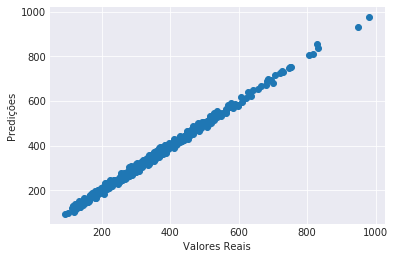

In [23]:
# Make cross validated predictions
predictions1 = cross_val_predict(model, df, y, cv=8)
plt.scatter(y, predictions1)
plt.xlabel("Valores Reais")
plt.ylabel("Predições")
plt.show()

In [25]:
accuracy1 = metrics.r2_score(y, predictions1)
print ("Cross-Predicted 6-fold  R^2:", accuracy1)

Cross-Predicted 6-fold  R^2: 0.9956065102178208


# Saving to a model pickle file and runing a API

To run api create a file with following code and execute it:

* [article](https://towardsdatascience.com/a-flask-api-for-serving-scikit-learn-models-c8bcdaa41daa)
* [github](https://github.com/amirziai/sklearnflask/)

```python
import json
from flask import Flask, request, jsonify
from sklearn.externals import joblib
import pandas as pd
import traceback

app = Flask(__name__)

COLUMNS = ['Income','Limit','Cards','Age','Education',
		   'Gender','Student','Married','Balance']

@app.route('/predict', methods=['POST'])
def predict():

	try:
		query = pd.DataFrame(request.json)
		query = query[COLUMNS]
		prediction = clf.predict(query)
		return jsonify({
			'data': query.to_dict(),
			'prediction': list(prediction)
			})

	except Exception as e:
		return jsonify({'error': str(e), 'trace': traceback.format_exc()})

if __name__ == '__main__':
    clf = joblib.load('../models/cross-validation-challenge-model.pkl')
    app.run(port=8080)
```

In [83]:
from sklearn.externals import joblib
joblib.dump(model, '../models/cross-validation-challenge-model.pkl')

['../models/cross-validation-challenge-model.pkl']

In [136]:
import requests

In [146]:
endpoint = 'http://127.0.0.1:8080/predict'

In [147]:
headers = {'Content-Type': 'application/json'}

In [148]:
data = df.iloc[:10]
data

,Income,Limit,Cards,Age,Education,Gender,Student,Married,Balance
0,14.891,3606,2,34,11,1,1,0,333
1,106.025,6645,3,82,15,1,0,0,903
2,104.593,7075,4,71,11,1,1,1,580
3,148.924,9504,3,36,11,1,1,1,964
4,55.882,4897,2,68,16,1,1,0,331
5,80.180,8047,4,77,10,1,1,1,1151
6,20.996,3388,2,37,12,1,1,1,203
7,71.408,7114,2,87,9,1,1,1,872
8,15.125,3300,5,66,13,1,1,1,279
9,71.061,6819,3,41,19,1,0,0,1350


In [160]:
data.to_json()

'{"Income":{"0":14.891,"1":106.025,"2":104.593,"3":148.924,"4":55.882,"5":80.18,"6":20.996,"7":71.408,"8":15.125,"9":71.061},"Limit":{"0":3606,"1":6645,"2":7075,"3":9504,"4":4897,"5":8047,"6":3388,"7":7114,"8":3300,"9":6819},"Cards":{"0":2,"1":3,"2":4,"3":3,"4":2,"5":4,"6":2,"7":2,"8":5,"9":3},"Age":{"0":34,"1":82,"2":71,"3":36,"4":68,"5":77,"6":37,"7":87,"8":66,"9":41},"Education":{"0":11,"1":15,"2":11,"3":11,"4":16,"5":10,"6":12,"7":9,"8":13,"9":19},"Gender":{"0":1,"1":1,"2":1,"3":1,"4":1,"5":1,"6":1,"7":1,"8":1,"9":1},"Student":{"0":1,"1":0,"2":1,"3":1,"4":1,"5":1,"6":1,"7":1,"8":1,"9":0},"Married":{"0":0,"1":0,"2":1,"3":1,"4":0,"5":1,"6":1,"7":1,"8":1,"9":0},"Balance":{"0":333,"1":903,"2":580,"3":964,"4":331,"5":1151,"6":203,"7":872,"8":279,"9":1350}}'

In [149]:
r = requests.post(endpoint, data.to_json(), headers=headers)

In [153]:
response = r.json()

In [154]:
data

,Income,Limit,Cards,Age,Education,Gender,Student,Married,Balance
0,14.891,3606,2,34,11,1,1,0,333
1,106.025,6645,3,82,15,1,0,0,903
2,104.593,7075,4,71,11,1,1,1,580
3,148.924,9504,3,36,11,1,1,1,964
4,55.882,4897,2,68,16,1,1,0,331
5,80.180,8047,4,77,10,1,1,1,1151
6,20.996,3388,2,37,12,1,1,1,203
7,71.408,7114,2,87,9,1,1,1,872
8,15.125,3300,5,66,13,1,1,1,279
9,71.061,6819,3,41,19,1,0,0,1350


In [155]:
pd.DataFrame(response['data'])

,Age,Balance,Cards,Education,Gender,Income,Limit,Married,Student
0,34,333,2,11,1,14.891,3606,0,1
1,82,903,3,15,1,106.025,6645,0,0
2,71,580,4,11,1,104.593,7075,1,1
3,36,964,3,11,1,148.924,9504,1,1
4,68,331,2,16,1,55.882,4897,0,1
5,77,1151,4,10,1,80.180,8047,1,1
6,37,203,2,12,1,20.996,3388,1,1
7,87,872,2,9,1,71.408,7114,1,1
8,66,279,5,13,1,15.125,3300,1,1
9,41,1350,3,19,1,71.061,6819,0,0


In [158]:
response['prediction']

[273.8746784566727,
 487.8614900460925,
 512.9515455731391,
 674.1849625691643,
 361.78211618795973,
 581.4467435064394,
 259.7260322342712,
 512.5443401049972,
 262.82830692534856,
 501.82664880944697]

In [159]:
y.head(10)

0    283
1    483
2    514
3    681
4    357
5    569
6    259
7    512
8    266
9    491
Name: Rating, dtype: int64

In [112]:
model.predict(data)

array([273.87467846, 487.86149005, 512.95154557, 674.18496257,
       361.78211619, 581.44674351, 259.72603223, 512.5443401 ,
       262.82830693, 501.82664881])

## Parte_4: Curva de aprendizado

In [26]:
print(__doc__)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


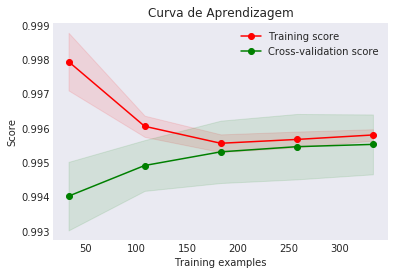

In [29]:
# plotando a curva de aprendizado usando o metodo de validação cruzada ShuffleSplit
ss = ShuffleSplit(n_splits=8, test_size=0.25, random_state=0)
lm = linear_model.LinearRegression()
plot_learning_curve(lm, 'Curva de Aprendizagem', df, y, cv=6, n_jobs=4)
plt.show()